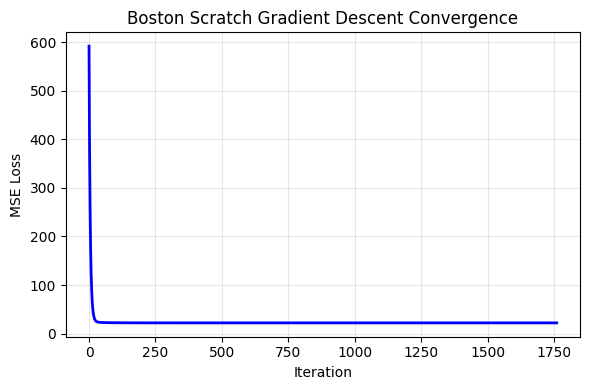

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


CSV_PATH = r"C:\Users\aparn\Downloads\BostonHousing.csv"   # <-- include .csv
df = pd.read_csv(CSV_PATH)


possible_target_names = ['MEDV','medv','PRICE','price','target','Target']
target_col = None
for c in df.columns:
    if c in possible_target_names:
        target_col = c
        break
if target_col is None:
    for c in df.columns:
        if 'med' in c.lower() or 'price' in c.lower() or 'target' in c.lower():
            target_col = c
            break
if target_col is None:
    raise ValueError("Target column not found!")


X_df = df.drop(columns=[target_col])
y = df[target_col].astype(float).values.reshape(-1,1)


X_df = pd.get_dummies(X_df, drop_first=True)
X_df = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X_df),
                    columns=X_df.columns)

X = X_df.values.astype(float)
n, p = X.shape


X_mean = X.mean(axis=0, keepdims=True)
X_std = X.std(axis=0, keepdims=True)
X_std[X_std == 0] = 1.0
Xs = (X - X_mean) / X_std
X_design = np.hstack([np.ones((n,1)), Xs])


def gradient_descent(Xd, y, lr=0.05, max_iters=20000, tol=1e-9, patience=500):
    n, d = Xd.shape
    theta = np.zeros((d,1))
    prev_loss = np.inf
    no_improve = 0
    losses = []
    for it in range(1, max_iters+1):
        preds = Xd @ theta
        errors = preds - y
        loss = (errors**2).mean()
        grad = (2.0 / n) * (Xd.T @ errors)
        theta = theta - lr * grad
        losses.append(loss)
        if abs(prev_loss - loss) < tol:
            no_improve += 1
        else:
            no_improve = 0
        if no_improve >= patience:
            break
        prev_loss = loss
    return theta, losses


theta_scratch, loss_hist_boston = gradient_descent(
    X_design, y, lr=0.05, max_iters=20000, tol=1e-9, patience=500
)

# ============================
# Plot Convergence Curve
# ============================
plt.figure(figsize=(6,4))
plt.plot(loss_hist_boston, linewidth=2, color="blue")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Boston Scratch Gradient Descent Convergence")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("boston_scratch_loss.png", dpi=300)
plt.show()
